In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
t = 155
dt = 1/365
Pt = np.zeros(t)
Pt[0] = 1
dP = np.zeros(t)
Mt = np.zeros(t)
Mt[0:40] = 30
Mt[40:75] = 124.1
Mt[75:110] = 191.6
Mt[110:155] = 209.3
Rain = np.zeros(t)
Rain[0] = Mt[0] * Pt[0]

In [3]:
sigma = np.zeros(t)
#sigma[0:155] = 1
sigma[0:40] = 1.3
sigma[40:75] = 0.1
sigma[75:110] = 0.7
sigma[110:155] = 0.1

In [4]:
# Q2
# Specify the number of Monte-Carlo simulations
MC = 10000

# Save the mean of each trial of each phase
Ph0 = np.zeros(MC)
Ph1 = np.zeros(MC)
Ph2 = np.zeros(MC)
Ph3 = np.zeros(MC)

# Monte-Carlo simulations
for i in range(0, MC):

    # Calculate the rainfall over 155 days
    for j in range(1, t):
        dP[j] = Pt[j-1] * sigma[j-1] * np.random.normal() * np.sqrt(dt)
        Pt[j] = Pt[j-1] + dP[j]
        Rain[j] = Mt[j] * Pt[j]
        if Rain[j] <= 0:
            Rain[j] = 0
    
    # Calculate the mean of each phase
    Ph0[i] = np.mean(Rain[0:40])
    Ph1[i] = np.mean(Rain[40:75])
    Ph2[i] = np.mean(Rain[75:115])
    Ph3[i] = np.mean(Rain[115:155])

SD0 = np.std(Ph0)
SD1 = np.std(Ph1)
SD2 = np.std(Ph2)
SD3 = np.std(Ph3)
mu0 = np.mean(Ph0)
mu1 = np.mean(Ph1)
mu2 = np.mean(Ph2)
mu3 = np.mean(Ph3)
data = pd.DataFrame({"MU":[mu0,mu1,mu2,mu3],"SD":[SD0,SD1,SD2,SD3],"Phase":[0,1,2,3]})
data.set_index("Phase", inplace=True)
data

,MU,SD
Phase,,
0,29.927474,7.408229
1,123.612370,55.075635
2,192.659772,90.458474
3,207.947224,105.637471


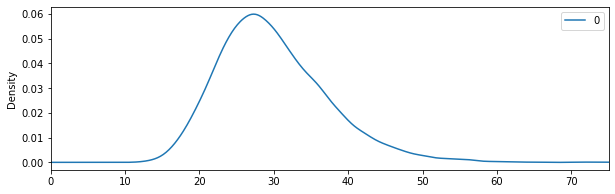

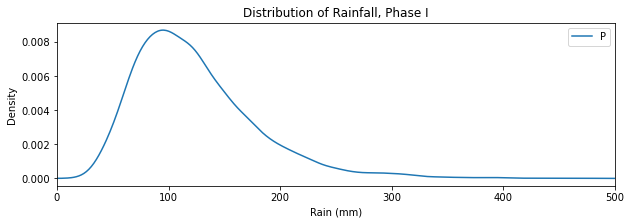

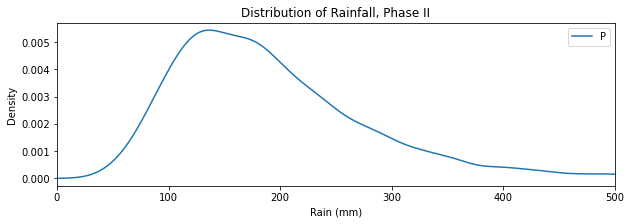

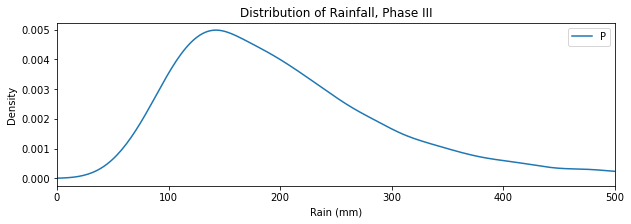

In [5]:
# Q2
pd.DataFrame(Ph0).plot.density(figsize=(10,3))
plt.xlim(0,75)
pd.DataFrame(Ph1).plot.density(figsize=(10,3))
plt.title("Distribution of Rainfall, Phase I")
plt.xlabel("Rain (mm)")
plt.legend("Probability")
plt.xlim(0,500)
pd.DataFrame(Ph2).plot.density(figsize=(10,3))
plt.title("Distribution of Rainfall, Phase II")
plt.xlabel("Rain (mm)")
plt.legend("Probability")
plt.xlim(0,500)
pd.DataFrame(Ph3).plot.density(figsize=(10,3))
plt.title("Distribution of Rainfall, Phase III")
plt.xlabel("Rain (mm)")
plt.legend("Probability")
plt.xlim(0,500);

In [6]:
# Specify the number of Monte-Carlo simulations
MC = 10000

# Save the mean of each trial of each phase
Ph0 = np.zeros(MC)
Ph1 = np.zeros(MC)
Ph2 = np.zeros(MC)
Ph3 = np.zeros(MC)

# Monte-Carlo simulations
for i in range(0, MC):

    # Calculate the rainfall over 155 days
    for j in range(1, t):
        dP[j] = Pt[j-1] * sigma[j-1] * np.random.normal() * np.sqrt(dt)
        Pt[j] = Pt[j-1] + dP[j]
        Rain[j] = Mt[j] * Pt[j]
        if Rain[j] <= 0:
            Rain[j] = 0
    
    # Calculate the mean of each phase
    Ph0[i] = np.mean(Rain[0:40])
    Ph1[i] = np.mean(Rain[40:75])
    Ph2[i] = np.mean(Rain[75:115])
    Ph3[i] = np.mean(Rain[115:155])

SD0 = np.std(Ph0)
SD1 = np.std(Ph1)
SD2 = np.std(Ph2)
SD3 = np.std(Ph3)
mu0 = np.mean(Ph0)
mu1 = np.mean(Ph1)
mu2 = np.mean(Ph2)
mu3 = np.mean(Ph3)
data = pd.DataFrame({"MU":[mu0,mu1,mu2,mu3],"SD":[SD0,SD1,SD2,SD3],"Phase":[0,1,2,3]})
data.set_index("Phase", inplace=True)
data

,MU,SD
Phase,,
0,29.976056,7.402623
1,123.715482,55.268801
2,193.100594,90.186557
3,207.887100,104.082941


In [7]:
# Examine the effect of different MC steps on SD

# Specify the number of Monte-Carlo simulations
MC = np.arange(10000,110000,10000)

SD0 = np.zeros(len(MC))
SD1 = np.zeros(len(MC))
SD2 = np.zeros(len(MC))
SD3 = np.zeros(len(MC))
mu0 = np.zeros(len(MC))
mu1 = np.zeros(len(MC))
mu2 = np.zeros(len(MC))
mu3 = np.zeros(len(MC))
#data = pd.DataFrame(index = np.array([0,1,2,3]*(len(MC))),columns = ["MU","SD","Phase"])
data = pd.DataFrame(columns = ["MC","Phase","MU","SD"])

for m in MC:
    # Save the mean of each trial of each phase
    Ph0 = np.zeros(m)
    Ph1 = np.zeros(m)
    Ph2 = np.zeros(m)
    Ph3 = np.zeros(m)

    # Monte-Carlo simulations
    for i in range(0, m):

        # Calculate the rainfall over 155 days
        for j in range(1, t):
            dP[j] = Pt[j-1] * sigma[j-1] * np.random.normal() * np.sqrt(dt)
            Pt[j] = Pt[j-1] + dP[j]
            Rain[j] = Mt[j] * Pt[j]
            if Rain[j] <= 0:
                Rain[j] = 0
        
        # Calculate the mean of each phase
        Ph0[i] = np.mean(Rain[0:40])
        Ph1[i] = np.mean(Rain[40:75])
        Ph2[i] = np.mean(Rain[75:115])
        Ph3[i] = np.mean(Rain[115:155])

    SD0[int(m/10000)-1] = np.std(Ph0)
    SD1[int(m/10000)-1] = np.std(Ph1)
    SD2[int(m/10000)-1] = np.std(Ph2)
    SD3[int(m/10000)-1] = np.std(Ph3)
    mu0[int(m/10000)-1] = np.mean(Ph0)
    mu1[int(m/10000)-1] = np.mean(Ph1)
    mu2[int(m/10000)-1] = np.mean(Ph2)
    mu3[int(m/10000)-1] = np.mean(Ph3)
    
    data0 = pd.DataFrame({"MC":[m,m,m,m],"Phase":[0,1,2,3],"MU":[mu0[int(m/10000)-1],mu1[int(m/10000)-1],mu2[int(m/10000)-1],mu3[int(m/10000)-1]],\
        "SD":[SD0[int(m/10000)-1],SD1[int(m/10000)-1],SD2[int(m/10000)-1],SD3[int(m/10000)-1]]})
    data = pd.concat([data,data0])
data

,MC,Phase,MU,SD
0,10000,0,29.970696,7.470003
1,10000,1,124.133937,56.309846
2,10000,2,193.941930,93.295342
3,10000,3,209.452098,108.943761
0,20000,0,30.022348,7.435940
1,20000,1,123.951442,55.472001
2,20000,2,193.985367,91.392126
3,20000,3,209.514050,106.546203
0,30000,0,30.048307,7.483848
1,30000,1,124.375949,56.257158


In [17]:
# Q3
# Calculate value of the product with respect to different lambdas

# Specify the number of Monte-Carlo simulations
MC = 10000
# lam = lambda_rain; price of the risk
lam = np.concatenate((np.array([0]),np.arange(20,40)/50))
# Save the mean of each trial of each phase
Ph0 = np.zeros(MC)
Ph1 = np.zeros(MC)
Ph2 = np.zeros(MC)
Ph3 = np.zeros(MC)
# Save the data of different lambdas
Payoff1 = np.zeros(len(lam))
Payoff2 = np.zeros(len(lam))
Payoff3 = np.zeros(len(lam))
Value = np.zeros(len(lam))

# Simulate for different lambdas
for n in range(0,len(lam)):
    Pay1 = np.zeros(MC)
    Pay2 = np.zeros(MC)
    Pay3 = np.zeros(MC)
    # Monte-Carlo simulations
    for i in range(0, MC):

        # Calculate the rainfall over 155 days
        for j in range(1, t):
            dP[j] = -lam[n] * sigma[j-1] * Pt[j-1] * dt
            dP[j] += Pt[j-1] * sigma[j-1] * np.random.normal() * np.sqrt(dt)
            Pt[j] = Pt[j-1] + dP[j]
            Rain[j] = Mt[j] * Pt[j]
            if Rain[j] <= 0:
                Rain[j] = 0
    
        # Calculate the mean of each phase
        Ph0[i] = np.mean(Rain[0:40])
        Ph1[i] = np.mean(Rain[40:75])
        Ph2[i] = np.mean(Rain[75:115])
        Ph3[i] = np.mean(Rain[115:155])

        # Calculate the Payoff in each phase
        if Ph1[i] < 20:
            Pay1[i] = 1500
        elif Ph1[i] < 75:
            Pay1[i] = (75 - int(Ph1[i])) * 15
        else:
            Pay1[i] = 0
        
        if Ph2[i] < 50:
            Pay2[i] = 2000
        elif Ph2[i] < 110:
            Pay2[i] = (110 - int(Ph2[i])) * 10
        else:
            Pay2[i] = 0
        
        if Ph3[i] < 50:
            Pay3[i] = 2500
        elif Ph3[i] < 75:
            Pay3[i] = (75 - int(Ph3[i])) * 5
        else:
            Pay3[i] = 0

    # Calculate the expected payoff of each phase, discounted
    Payoff1[n] = np.mean(Pay1) * np.exp(-0.24 * 30/365)
    Payoff2[n] = np.mean(Pay2) * np.exp(-0.24 * 30/365)
    Payoff3[n] = np.mean(Pay3) * np.exp(-0.24 * 30/365)

    Value[n] = Payoff1[n] + Payoff2[n] + Payoff3[n]
Value
Output = pd.DataFrame({"lambda":lam,"Value":Value})
Output

,lambda,Value
0,0.00,86.781157
1,0.40,121.521073
2,0.42,122.254462
3,0.44,122.520169
4,0.46,130.208503
5,0.48,126.911192
6,0.50,134.205378
7,0.52,125.019380
8,0.54,136.975198
9,0.56,136.748710
